In [1]:
import pandas as pd

In [2]:
ORIGINAL_DATA_PATH=r"../Dataset/Reviews.csv"

In [18]:
data=pd.read_csv(ORIGINAL_DATA_PATH)

In [4]:

COLUMNS=list(data.columns)

In [5]:
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


#### Exploring the data in the dataset



#### Trovo i nan values 


In [69]:
def count_nan_values_for_col(data):
    nan_values=data.isna()
    cols=list(data.columns)
    #dic col to nan values
    col2nan={}
    for i in cols:
        col2nan[i]=nan_values[i].sum()
    return col2nan

In [73]:
numb_nan_4_col=count_nan_values_for_col(data)
numb_nan_4_col

{'Id': 0,
 'ProductId': 0,
 'UserId': 0,
 'ProfileName': 26,
 'HelpfulnessNumerator': 0,
 'HelpfulnessDenominator': 0,
 'Score': 0,
 'Time': 0,
 'Summary': 27,
 'Text': 0,
 'Text_extra_commas': 0,
 'Summary_extra_commas': 0,
 'ProfileName_extra_commas': 0}

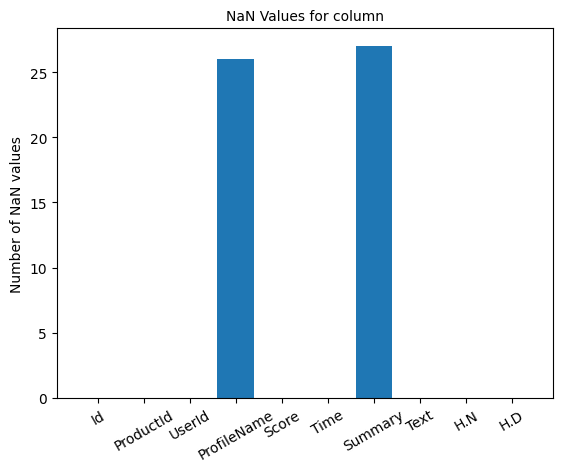

In [74]:
import matplotlib.pyplot as plt

numb_nan_4_col['H.N']=numb_nan_4_col["HelpfulnessNumerator"]
numb_nan_4_col["H.D"]=numb_nan_4_col['HelpfulnessDenominator']
numb_nan_4_col.pop("HelpfulnessNumerator")
numb_nan_4_col.pop("HelpfulnessDenominator")
numb_nan_4_col.pop("Summary_extra_commas")
numb_nan_4_col.pop("Text_extra_commas")
numb_nan_4_col.pop("ProfileName_extra_commas")
keys = list(numb_nan_4_col.keys())
values = list(numb_nan_4_col.values())

# create a bar plot of the data using Matplotlib

plt.bar(keys, values)

# set the axis labels and title

plt.ylabel('Number of NaN values',fontsize=10)
plt.xticks(rotation=30,fontsize=10)
plt.yticks(fontsize=10)
plt.title('NaN Values for column',fontsize=10)


plt.savefig("Nan_values_4_col.jpg")
# display the plot
plt.show()


In [9]:
#gli elementi aventi nan sono:
#1) USER (utile per esercizio 1)
#2) Summary (importante per lo split delle righe in fase di MAP)

#POLITICA
#Riempimento di tutte le celle nan con ""
data.fillna(value='""',inplace=True)

In [10]:
afer_parsing_nan_4_cols=count_nan_values_for_col(data)
afer_parsing_nan_4_cols

{'Id': 0,
 'ProductId': 0,
 'UserId': 0,
 'ProfileName': 0,
 'HelpfulnessNumerator': 0,
 'HelpfulnessDenominator': 0,
 'Score': 0,
 'Time': 0,
 'Summary': 0,
 'Text': 0}

### Il numero di , presenti in ogni riga è importante in fase di MAP.
### Questo in quanto, leggendo l'input come testo, per accedere alle colonne specifiche è necessario splittare la riga utilizzando il
### separatore di default (,). La presenza di un ',' in eccesso comporterebbe la creazione di un numero eccessivo di colonne per riga

In [15]:
#Prendo il numero ideale di ',' che dovrebbero esserci (#colonne - 1)
data['true_comma_pop']=len(COLUMNS)-1
data.head(10)




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,true_comma_pop,Text_extra_commas
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,9,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,9,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,9,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,9,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,9,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,9,8
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,9,2
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,9,0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,9,0
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,9,0


In [12]:
#checking

In [26]:
def count_commas(data):
    if type(data)==str:
        return data.count(',')
    else:
        return 0

In [27]:
data['Text_extra_commas']=data['Text'].apply(count_commas)
data['Summary_extra_commas']=data['Summary'].apply(count_commas)
data['ProfileName_extra_commas']=data['ProfileName'].apply(count_commas)

In [28]:
extra_commas_ProfileName=data[data['ProfileName_extra_commas']>0]

In [29]:
extra_commas_Summary=data[data['Summary_extra_commas']>0]

In [30]:
extra_commas_Text=data[data['Text_extra_commas']>0]

In [31]:
perc_rows_extra_comma_ProfileName=len(extra_commas_ProfileName)/len(data)
perc_rows_extra_comma_Summary=len(extra_commas_Summary)/len(data)
perc_rows_extra_comma_Text=len(extra_commas_Text)/len(data)

print("%Rows with comma in ProfileName:",perc_rows_extra_comma_ProfileName)
print("%Rows with comma in Summary:", perc_rows_extra_comma_Summary)
print("%Rows with comma in Text:",perc_rows_extra_comma_Text)

%Rows with comma in ProfileName: 0.007335685913020227
%Rows with comma in Summary: 0.09454414957058971
%Rows with comma in Text: 0.7259496810647827


In [19]:
#Samples dei dati nei casi specificati
#PROFILE NAME
extra_commas_ProfileName['ProfileName'].head(20)

281                    Little D, Nigel, and Oliver's mom
522      Betty L. Dravis "BETTY DRAVIS, author/reviewer"
895           Kort "Art, Music, Book & Movie Enthusiast"
1332                                  Zhills,Florida USA
1349    Catherine A. Sullivan "Catherine,Serene Butte...
1381    K. Crowe "I may make you feel, but I can't ma...
1395                            Brian F., Gloucester, MA
1404       J. Nusz "Author, reviewer & graphic designer"
1407                  from Hampton, VA "amazon customer"
1449    Arthur Thomas "Jesus, John Denver, and Judas ...
1495             Krystal-Karma "Blessings, Joy and Love"
1505                      Joanne "Gotta Eat, Gotta Cook"
1956                                  Cecil R. Redd, Jr.
2088        Robert "Member since, heck I forgot........"
2568    Joan A. Adamak "Joan  Adamak, Author and Book...
2909            William C. Meyer "Bill/Ginny-Howell, NJ"
2958    D. P. Wright "If it ain't broke, I'm gonna fi...
3012          Kort "Art, Music,

In [20]:
#SUMMARY
extra_commas_Summary['Summary'].head(20)

7                                 Wonderful, tasty taffy
15              Lots of twizzlers, just what you expect.
97        Great allergy sensitive dog food, dogs love it
135                Tastes great, but is cheaper locally.
163                                    Right size, taste
173             Fluffy, Soft, Delicious and Sugary Sweet
179            relaxing, almost like something you smoke
186         Make a fresh fruit tart, light and beautiful
194                       Nice little mints, but pricey.
204                             Love 'em, they're great!
209    better than average, more expensive than average.
235             Taste is neutral, quantity is DECEITFUL!
255    If you can't handle caffeine, this is not for ...
256                                  Yum, Yummy, Yummier
284                it's fabulous, but *not* from amazon!
291    The best energy shot out there, smooth and org...
292                            Fantastic, natural energy
304               Flavor gettin

In [21]:
#TEXT
extra_commas_Text['Text'].head(20)

2     This is a confection that has been around a fe...
4     Great taffy at a great price.  There was a wid...
5     I got a wild hair for taffy and ordered this f...
6     This saltwater taffy had great flavors and was...
10    I don't know if it's the cactus or the tequila...
11    One of my boys needed to lose some weight and ...
12    My cats have been happily eating Felidae Plati...
18    Twizzlers, Strawberry my childhood favorite ca...
20    My husband is a Twizzlers addict.  We've bough...
21    I bought these for my husband who is currently...
24    I have lived out of the US for over 7 yrs now,...
25    Product received is as advertised.<br /><br />...
26    The candy is just red , No flavor . Just  plan...
28    I got this for my Mum who is not diabetic but ...
29    I don't know if it's the cactus or the tequila...
30    I have never been a huge coffee fan. However, ...
31    This offer is a great price and a great taste,...
32    McCann's Instant Oatmeal is great if you m

### Modo migliore per eliminare tali casistiche->Sostituire tutti i ',' con ' '


# Parsing

In [22]:
def clear_data(line):
    line=line.replace(',',' ')
    return line


#Per ogni colonna da parsare effettuo il parsin->clear data
def parse_data(data,cols):
    for i in cols:
        data[i]=data[i].apply(clear_data)
    return data


In [23]:
#Rimozione delle , nei campi individuati

parsed_data=pd.DataFrame.copy(data,deep=True) #deep copy del dato originale

cols_to_parse=['Text','Summary','ProfileName']

#parsing
parsed_data=parse_data(parsed_data,cols_to_parse)





In [24]:
#verifica
commas_in_text=parsed_data['Text'].apply(count_commas).sum()
commas_in_ProfileName=parsed_data['ProfileName'].apply(count_commas).sum()
commas_in_Summary=parsed_data['Summary'].apply(count_commas).sum()

print('Commas in Text after parsing:',commas_in_text)
print('Commas in ProfileName after parsing:',commas_in_ProfileName)
print('Commas in Summary after parsing:',commas_in_Summary)

Commas in Text after parsing: 0
Commas in ProfileName after parsing: 0
Commas in Summary after parsing: 0


In [25]:
#EXAMPLE TEXT 
index_text_rows_w_comma_original_data=extra_commas_Text['Text'].head(20).index
for i in index_text_rows_w_comma_original_data:
    print('[ORG]',data['Text'].iloc[i])
    print('[PARSED]',parsed_data['Text'].iloc[i],'\n')

[ORG] This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
[PARSED] This is a confection that has been around a few centuries.  It is a light  pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy  and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion  The Witch  and The Wardrobe" - this is the treat that seduces Edmund into selling out his

In [26]:
#EXAMPLE PROFILENAME
index_text_rows_w_comma_original_data=extra_commas_ProfileName['ProfileName'].head(5).index
for i in index_text_rows_w_comma_original_data:
    print('[ORG]',data['ProfileName'].iloc[i])
    print('[PARSED]',parsed_data['ProfileName'].iloc[i],'\n')

[ORG] Little D, Nigel, and Oliver's mom
[PARSED] Little D  Nigel  and Oliver's mom 

[ORG] Betty L. Dravis "BETTY DRAVIS, author/reviewer"
[PARSED] Betty L. Dravis "BETTY DRAVIS  author/reviewer" 

[ORG] Kort "Art, Music, Book & Movie Enthusiast"
[PARSED] Kort "Art  Music  Book & Movie Enthusiast" 

[ORG] Zhills,Florida USA
[PARSED] Zhills Florida USA 

[ORG] Catherine A. Sullivan "Catherine,Serene Butte...
[PARSED] Catherine A. Sullivan "Catherine Serene Butte... 



In [27]:
#EXAMPLE SUMMARY
index_text_rows_w_comma_original_data=extra_commas_Summary['Summary'].head(5).index
for i in index_text_rows_w_comma_original_data:
    print('[ORG]',data['Summary'].iloc[i])
    print('[PARSED]',parsed_data['Summary'].iloc[i],'\n')

[ORG] Wonderful, tasty taffy
[PARSED] Wonderful  tasty taffy 

[ORG] Lots of twizzlers, just what you expect.
[PARSED] Lots of twizzlers  just what you expect. 

[ORG] Great allergy sensitive dog food, dogs love it
[PARSED] Great allergy sensitive dog food  dogs love it 

[ORG] Tastes great, but is cheaper locally.
[PARSED] Tastes great  but is cheaper locally. 

[ORG] Right size, taste
[PARSED] Right size  taste 



### SALVATAGGIO DATI PARSATI


In [28]:
parsed_data=parsed_data[COLUMNS]

parsed_data.to_csv('../Dataset/Rev_Parsed.csv',index=False)

# Analisi USERS

In [29]:
users_to_count={}   #user to count 
data=pd.read_csv('../Dataset/Rev_Parsed.csv')



In [30]:
users=data['UserId']

for u in users:
    if u not in users_to_count:
        users_to_count[u]=0
    users_to_count[u]+=1



In [31]:
#checking number of unique users


#checking the ratio of users for rev
ratio_user_rev=len(data)/len(users_to_count)

print('Unique users: ',len(users_to_count))
print('Total revs: ',len(data))
print('Ratio rev/users: ',ratio_user_rev)

Unique users:  256059
Total revs:  568454
Ratio rev/users:  2.2200117941568154


In [32]:
sorted_dict = sorted(users_to_count.items(), key=lambda x: x[1],reverse=True)
#creating a dataframe
id_to_rev_count=pd.DataFrame(data=sorted_dict,columns=['ID','#Rev'])
id_to_rev_count.head(10)




,ID,#Rev
0,A3OXHLG6DIBRW8,448
1,A1YUL9PCJR3JTY,421
2,AY12DBB0U420B,389
3,A281NPSIMI1C2R,365
4,A1Z54EM24Y40LL,256
5,A1TMAVN4CEM8U8,204
6,A2MUGFV2TDQ47K,201
7,A3TVZM3ZIXG8YW,199
8,A3PJZ8TU8FDQ1K,178
9,AQQLWCMRNDFGI,176


# Job 2
### Checking if reviews have 0 HelpfulnessDenominator


In [33]:
data=pd.read_csv('../Dataset/Rev_Parsed.csv')

helpfulness=data[['UserId','HelpfulnessDenominator','HelpfulnessNumerator']]

check_help=helpfulness[helpfulness['HelpfulnessDenominator']==0]

check_help_all=check_help[check_help['HelpfulnessDenominator']!=check_help['HelpfulnessNumerator']]

len(check_help_all)

0

In [34]:
maxim=len(data[data['UserId']=='A3OXHLG6DIBRW8'])
maxim

448

In [35]:
from datetime import datetime
def convert_time(line):
    OUTPUT_FORMAT = '%Y-%m-%d %H:%M:%S'
    output=''
    try:
        date=int(line)
        # build a datetime object from the unix time
        datetime_obj = datetime.utcfromtimestamp(date)

        # get the output date string
        out_date_str = datetime_obj.strftime(OUTPUT_FORMAT)


        return out_date_str
    except ValueError:
        return ''

        


In [36]:
#converting unix time in timestamp
import pandas as pd
data=pd.read_csv('../Dataset/Rev_Parsed.csv')
data['TimeCreation']=data['Time'].apply(convert_time)

data[['Time','TimeCreation']].head(10)

data.to_csv('../Dataset/Rev_Parsed.csv',index=False)